# **Fetch Processed Data**

In [1]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read saved train, test and validation data
X_train = pd.read_csv("drive/MyDrive/X_train.csv")
y_train = pd.read_csv("drive/MyDrive/y_train.csv")
X_test = pd.read_csv("drive/MyDrive/X_test.csv")
y_test = pd.read_csv("drive/MyDrive/y_test.csv")
X_val = pd.read_csv("drive/MyDrive/X_val.csv")
y_val = pd.read_csv("drive/MyDrive/y_val.csv")

In [3]:
# see an image size
pic_size = int(np.sqrt(X_train.shape[1]))
pic_size

128

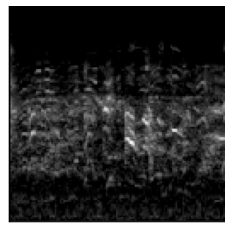

In [4]:
# visualize one of the spectrogram in train dataset
pic1 = X_train.iloc[0].values
pic1 = pic1.reshape((pic_size, pic_size))
plt.imshow(pic1, cmap="gray")
plt.axis("off")
plt.show()

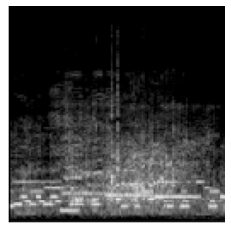

In [5]:
# visualize one of the spectrogram in test dataset
pic1 = X_test.iloc[0].values
pic1 = pic1.reshape((pic_size, pic_size))
plt.imshow(pic1, cmap="gray")
plt.axis("off")
plt.show()

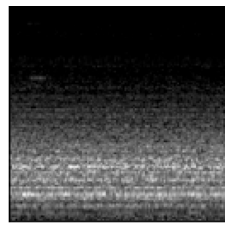

In [6]:
# visualize one of the spectrogram in validation dataset
pic1 = X_val.iloc[0].values
pic1 = pic1.reshape((pic_size, pic_size))
plt.imshow(pic1, cmap="gray")
plt.axis("off")
plt.show()

In [7]:
# reshape the train, test and validation data for CNN model 
X_train = X_train.values.reshape(-1, 128, 128, 1)
print("X_train shape:", X_train.shape)

X_test = X_test.values.reshape(-1, 128, 128, 1)
print("X_test shape:", X_test.shape)

X_val = X_val.values.reshape(-1, 128, 128, 1)
print("X_val shape:", X_val.shape)

X_train shape: (5937, 128, 128, 1)
X_test shape: (1747, 128, 128, 1)
X_val shape: (1048, 128, 128, 1)


In [8]:
# label coding
from keras.utils.np_utils import to_categorical 
y_train = to_categorical(y_train, num_classes=10)  # for turn into a vector
y_test = to_categorical(y_test, num_classes=10)    # for turn into a vector
y_val = to_categorical(y_val, num_classes=10)      # for turn into a vector

In [9]:
# see all the data shape after reshape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

X_train: (5937, 128, 128, 1)
y_train: (5937, 10)
X_test: (1747, 128, 128, 1)
y_test: (1747, 10)
X_val: (1048, 128, 128, 1)
y_val: (1048, 10)


# **Build a First CNN Model**

In [10]:
# import libraries for convolutional neural network
# build a CNN model with random parameters and see an accuracy
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop

model = Sequential()

model.add(Conv2D(filters=256, kernel_size=(5, 5), padding="Same",
                activation="elu", input_shape=(128, 128, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(5, 5), padding="Same",
                activation="elu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="Same",
                activation="elu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# full connect
model.add(Flatten())
model.add(Dense(512, activation="elu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax"))

In [11]:
model.compile(optimizer="RMSprop", loss="categorical_crossentropy",
              metrics=["accuracy"])

# **Train the First CNN Model**

In [12]:
# train the first CNN model
first_results = model.fit(X_train, y_train,
                    batch_size=150,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/10
40/40 - 39s - loss: 16.8404 - accuracy: 0.2100 - val_loss: 1.9108 - val_accuracy: 0.3435 - 39s/epoch - 979ms/step
Epoch 2/10
40/40 - 19s - loss: 5.7484 - accuracy: 0.3150 - val_loss: 6.3278 - val_accuracy: 0.3120 - 19s/epoch - 483ms/step
Epoch 3/10
40/40 - 20s - loss: 3.1717 - accuracy: 0.3010 - val_loss: 1.8416 - val_accuracy: 0.4380 - 20s/epoch - 491ms/step
Epoch 4/10
40/40 - 20s - loss: 3.3262 - accuracy: 0.3328 - val_loss: 2.2760 - val_accuracy: 0.3702 - 20s/epoch - 498ms/step
Epoch 5/10
40/40 - 20s - loss: 1.8672 - accuracy: 0.4512 - val_loss: 1.6326 - val_accuracy: 0.4828 - 20s/epoch - 510ms/step
Epoch 6/10
40/40 - 21s - loss: 2.0372 - accuracy: 0.4837 - val_loss: 2.1154 - val_accuracy: 0.4647 - 21s/epoch - 522ms/step
Epoch 7/10
40/40 - 20s - loss: 1.4963 - accuracy: 0.5750 - val_loss: 1.1289 - val_accuracy: 0.6355 - 20s/epoch - 511ms/step
Epoch 8/10
40/40 - 20s - loss: 1.3932 - accuracy: 0.6166 - val_loss: 0.9062 - val_accuracy: 0.7214 - 20s/epoch - 510ms/step
Epoch 9

# **Build an Optimized CNN Model**

In [13]:
# change the parameters of the first model and build an optimized CNN model
optimized_model = Sequential()

optimized_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="Same",
                activation="tanh", input_shape=(128, 128, 1)))
optimized_model.add(MaxPool2D(pool_size=(2, 2)))
optimized_model.add(Dropout(0.5))

optimized_model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="Same",
                activation="tanh"))
optimized_model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
optimized_model.add(Dropout(0.6))

optimized_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same",
                activation="tanh"))
optimized_model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
optimized_model.add(Dropout(0.25))

# full connect
optimized_model.add(Flatten())
optimized_model.add(Dense(512, activation="tanh"))
optimized_model.add(Dropout(0.7))

optimized_model.add(Dense(10, activation="sigmoid"))

In [14]:
optimized_model.compile(optimizer="Adam", loss="categorical_crossentropy",
              metrics=["accuracy"])

# **Train the Optimized CNN Model**

In [15]:
# train the optimized CNN model
results = optimized_model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/10
119/119 - 50s - loss: 1.6619 - accuracy: 0.4581 - val_loss: 1.4913 - val_accuracy: 0.4666 - 50s/epoch - 418ms/step
Epoch 2/10
119/119 - 39s - loss: 0.9621 - accuracy: 0.6842 - val_loss: 0.7864 - val_accuracy: 0.7309 - 39s/epoch - 332ms/step
Epoch 3/10
119/119 - 40s - loss: 0.7314 - accuracy: 0.7561 - val_loss: 0.9256 - val_accuracy: 0.7099 - 40s/epoch - 333ms/step
Epoch 4/10
119/119 - 40s - loss: 0.5911 - accuracy: 0.8034 - val_loss: 0.6816 - val_accuracy: 0.7929 - 40s/epoch - 334ms/step
Epoch 5/10
119/119 - 40s - loss: 0.4427 - accuracy: 0.8516 - val_loss: 0.6539 - val_accuracy: 0.7958 - 40s/epoch - 334ms/step
Epoch 6/10
119/119 - 40s - loss: 0.3744 - accuracy: 0.8723 - val_loss: 0.5840 - val_accuracy: 0.8321 - 40s/epoch - 333ms/step
Epoch 7/10
119/119 - 40s - loss: 0.2881 - accuracy: 0.9028 - val_loss: 0.5580 - val_accuracy: 0.8473 - 40s/epoch - 334ms/step
Epoch 8/10
119/119 - 40s - loss: 0.2517 - accuracy: 0.9170 - val_loss: 0.5397 - val_accuracy: 0.8397 - 40s/epoch - 334

We can see the Optimized CNN Model is more successful after hyperparameter optimization.

# **Results**

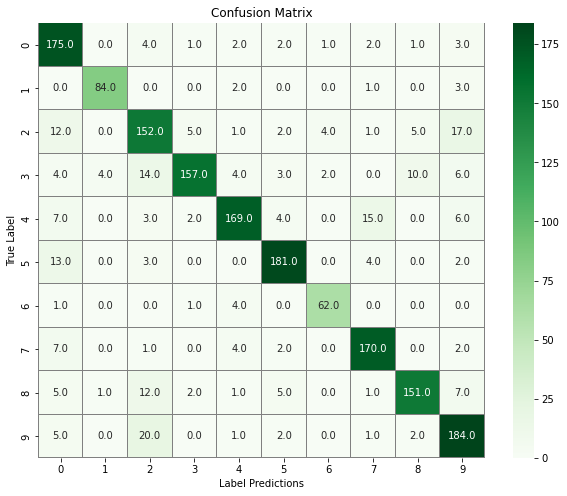

In [16]:
# predict and print a confusion matrix
y_pred = optimized_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,
            cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Label Predictions")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_classes, y_true))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       229
           1       0.93      0.94      0.94        89
           2       0.76      0.73      0.75       209
           3       0.77      0.93      0.84       168
           4       0.82      0.90      0.86       188
           5       0.89      0.90      0.90       201
           6       0.91      0.90      0.91        69
           7       0.91      0.87      0.89       195
           8       0.82      0.89      0.85       169
           9       0.86      0.80      0.83       230

    accuracy                           0.85      1747
   macro avg       0.86      0.86      0.86      1747
weighted avg       0.85      0.85      0.85      1747



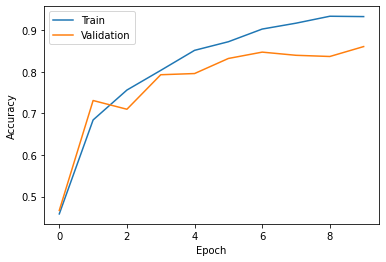

In [18]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label='Train')

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label='Validation')

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

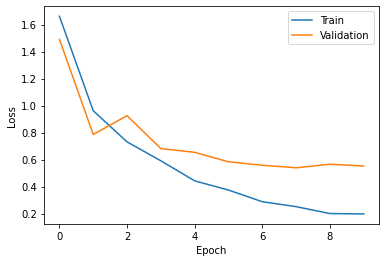

In [19]:
# Plot the the training loss
plt.plot(results.history["loss"], label='Train')

# Plot the the validation loss
plt.plot(results.history["val_loss"], label='Validation')

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [20]:
# Evaluate the test performance
optimized_model.evaluate(X_test, y_test)

55/55 [==============================] - 3s 60ms/step - loss: 0.5320 - accuracy: 0.8500


[0.5319752097129822, 0.8500286340713501]